## Supervised Machine Learning Final Assignment

###### In this notebook, various machine learning methods is applied to predict if a person can be diagnosed with Parkinson's Disease using his dysphonic voice patterns data.

###### I chose this dataset because we are working on a project to find new metabolites that may have relation with parkinson. furthermore, I am interested in having more knowledege about this disease because it is increasing day by day and there is no difinite cure for it.

##### The best model will be represented that predicts Parkinson's disease up to 93% accuracy, 54 correct and 5 incorrect predictions.¶

Data is obtained according to the below researches:

Max, A. (2008). Little, Member IEEE, Patrick E. Mc. Sharry, Senior Member IEEE, Eric J. Hunter, Jennifer Spielman, Lorraine O. Ramig,“Suitability of dysphonia measurements for telemonitoring of Parkinson’s disease”, System Analysis, Modelling and Prediction Group, University of Oxford, UK.

Little, M., Mcsharry, P., Roberts, S., Costello, D., & Moroz, I. (2007). Exploiting nonlinear recurrence and fractal scaling properties for voice disorder detection. Nature Precedings, 1-1.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as opt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.ensemble import StackingClassifier, VotingClassifier
from sklearn.manifold import TSNE
from subprocess import call
from IPython.display import Image
from sklearn import tree
from sklearn.model_selection import GridSearchCV

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


# Getting the data

In [2]:
df = pd.read_csv('parkinsons.data', sep=',')
df.head()

name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0  phon_R01_S01_1      119.992       157.302        74.997         0.00784   
1  phon_R01_S01_2      122.400       148.650       113.819         0.00968   
2  phon_R01_S01_3      116.682       131.111       111.555         0.01050   
3  phon_R01_S01_4      116.676       137.871       111.366         0.00997   
4  phon_R01_S01_5      116.014       141.781       110.655         0.01284   

   MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  ...  \
0           0.00007   0.00370   0.00554     0.01109       0.04374  ...   
1           0.00008   0.00465   0.00696     0.01394       0.06134  ...   
2           0.00009   0.00544   0.00781     0.01633       0.05233  ...   
3           0.00009   0.00502   0.00698     0.01505       0.05492  ...   
4           0.00011   0.00655   0.00908     0.01966       0.06425  ...   

   Shimmer:DDA      NHR     HNR  status      RPDE       DFA   spread1  \
0      0.06545  0.02211  21.033       1  0.414783  0.815285 -4.813031   
1      0.09403  0.01929  19.085       1  0.458359  0.819521 -4.075192   
2      0.08270  0.01309  20.651       1  0.429895  0.825288 -4.443179   
3      0.08771  0.01353  20.644       1  0.434969  0.819235 -4.117501   
4      0.10470  0.01767  19.649       1  0.417356  0.823484 -3.747787   

    spread2        D2       PPE  
0  0.266482  2.301442  0.284654  
1  0.335590  2.486855  0.368674  
2  0.311173  2.342259  0.332634  
3  0.334147  2.405554  0.368975  
4  0.234513  2.332180  0.410335  

[5 rows x 24 columns]

# Data Inspection and Data Cleaning

###### summarize the central tendency, dispersion and shape of a dataset's distribution

In [3]:
df.describe()

MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
count   195.000000    195.000000    195.000000      195.000000   
mean    154.228641    197.104918    116.324631        0.006220   
std      41.390065     91.491548     43.521413        0.004848   
min      88.333000    102.145000     65.476000        0.001680   
25%     117.572000    134.862500     84.291000        0.003460   
50%     148.790000    175.829000    104.315000        0.004940   
75%     182.769000    224.205500    140.018500        0.007365   
max     260.105000    592.030000    239.170000        0.033160   

       MDVP:Jitter(Abs)    MDVP:RAP    MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
count        195.000000  195.000000  195.000000  195.000000    195.000000   
mean           0.000044    0.003306    0.003446    0.009920      0.029709   
std            0.000035    0.002968    0.002759    0.008903      0.018857   
min            0.000007    0.000680    0.000920    0.002040      0.009540   
25%            0.000020    0.001660    0.001860    0.004985      0.016505   
50%            0.000030    0.002500    0.002690    0.007490      0.022970   
75%            0.000060    0.003835    0.003955    0.011505      0.037885   
max            0.000260    0.021440    0.019580    0.064330      0.119080   

       MDVP:Shimmer(dB)  ...  Shimmer:DDA         NHR         HNR      status  \
count        195.000000  ...   195.000000  195.000000  195.000000  195.000000   
mean           0.282251  ...     0.046993    0.024847   21.885974    0.753846   
std            0.194877  ...     0.030459    0.040418    4.425764    0.431878   
min            0.085000  ...     0.013640    0.000650    8.441000    0.000000   
25%            0.148500  ...     0.024735    0.005925   19.198000    1.000000   
50%            0.221000  ...     0.038360    0.011660   22.085000    1.000000   
75%            0.350000  ...     0.060795    0.025640   25.075500    1.000000   
max            1.302000  ...     0.169420    0.314820   33.047000    1.000000   

             RPDE         DFA     spread1     spread2          D2         PPE  
count  195.000000  195.000000  195.000000  195.000000  195.000000  195.000000  
mean     0.498536    0.718099   -5.684397    0.226510    2.381826    0.206552  
std      0.103942    0.055336    1.090208    0.083406    0.382799    0.090119  
min      0.256570    0.574282   -7.964984    0.006274    1.423287    0.044539  
25%      0.421306    0.674758   -6.450096    0.174351    2.099125    0.137451  
50%      0.495954    0.722254   -5.720868    0.218885    2.361532    0.194052  
75%      0.587562    0.761881   -5.046192    0.279234    2.636456    0.252980  
max      0.685151    0.825288   -2.434031    0.450493    3.671155    0.527367  

[8 rows x 23 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

##### There is no missing data. Type of columns are correct exept name that will be dropped later.

In [5]:
# checking for missing values
df.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [6]:
# there are 2 classes
df.status.unique()

array([1, 0], dtype=int64)

In [7]:
# count number of observations in each status
PD , healthy= df.status.value_counts()
print(f'number of healthy: {healthy} and number of PD: {PD}')
print(f'percentage of healthy: {round(healthy / len(df) * 100, 2)}%')
print(f'percentage of PD: {round(PD / len(df) * 100, 2)}%')

number of healthy: 48 and number of PD: 147
percentage of healthy: 24.62%
percentage of PD: 75.38%


##### To avoid overfitting due to having too many features, dimensionality reduction should be done. In this way, only the most informative features will be kept. correlation can be checked in several ways:

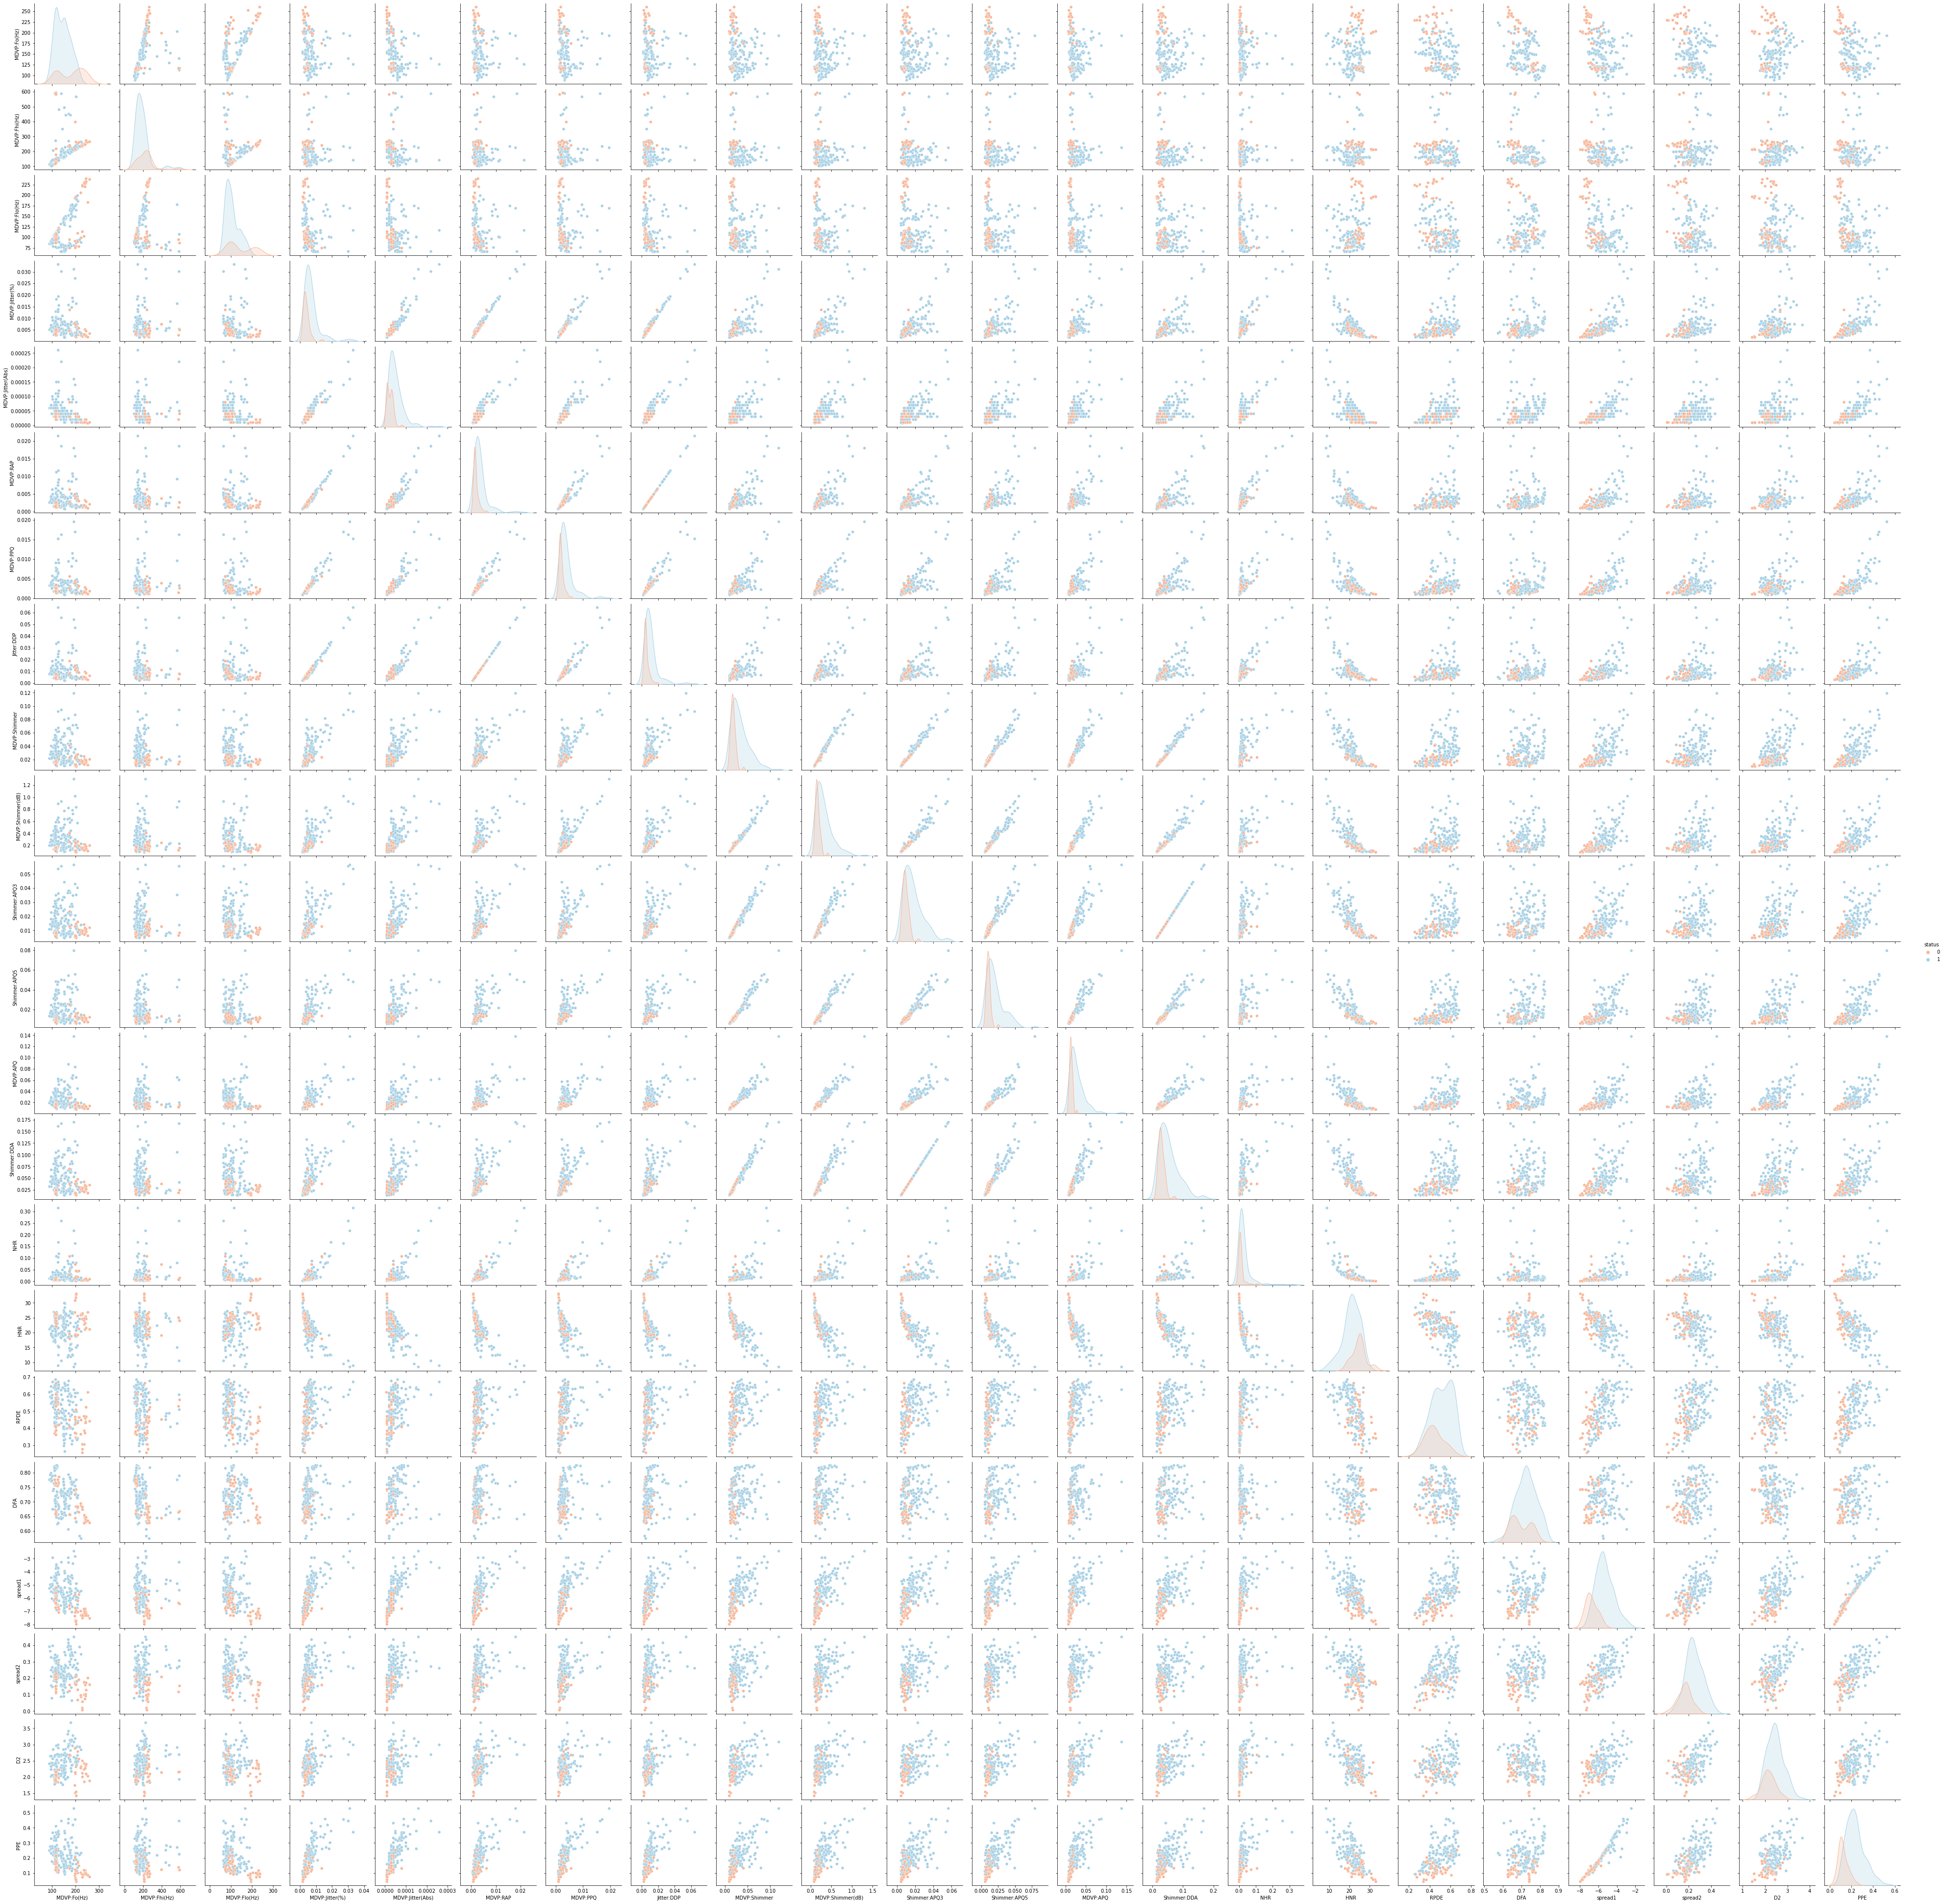

In [8]:
sns.pairplot(data=df, hue='status', palette='RdBu')

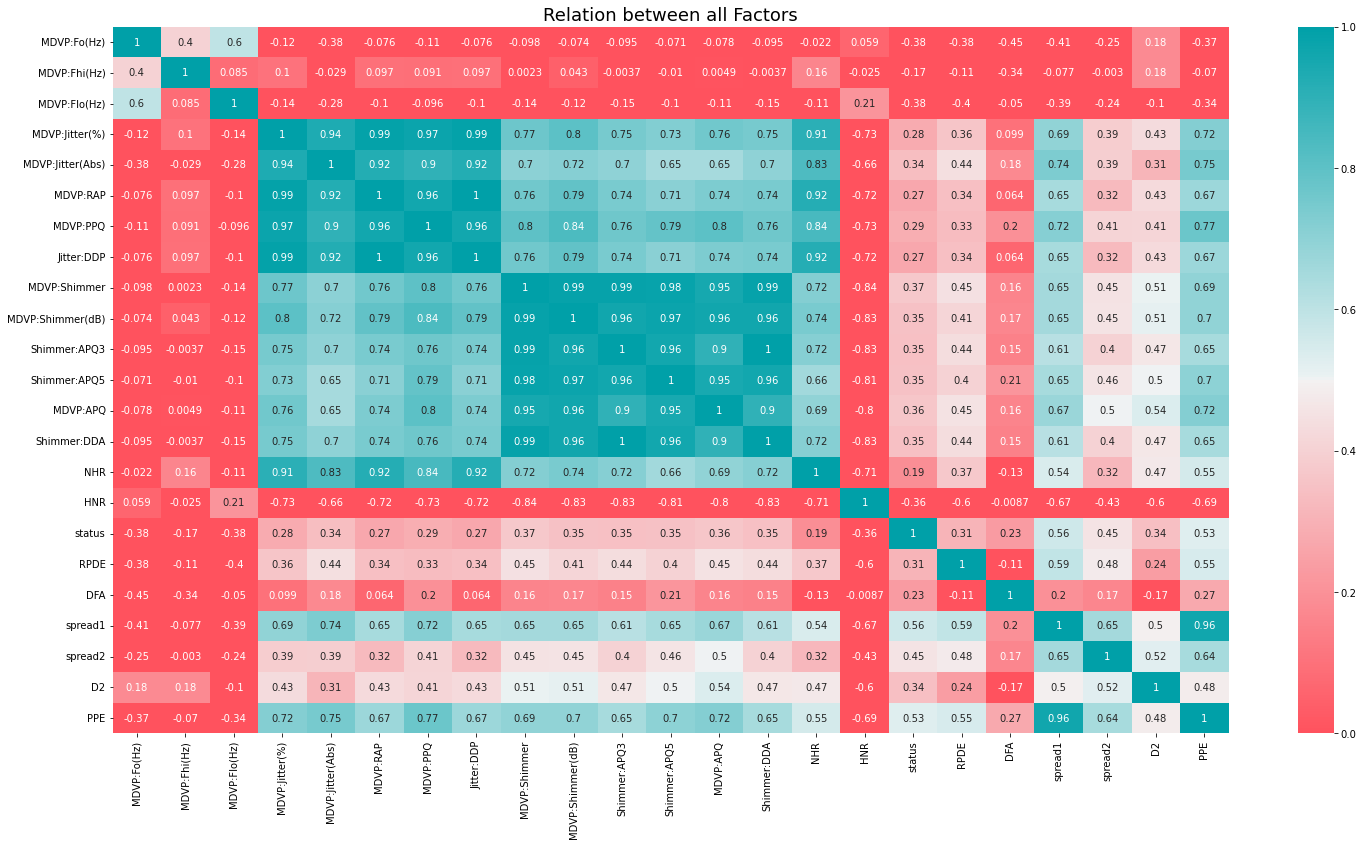

In [9]:
plt.rcParams["figure.figsize"] = (25, 13)
cmap = sns.diverging_palette(10, 200, 100, 60, as_cmap=True)
# cmap = sns.color_palette("mako", as_cmap=True)
# cmap = sns.color_palette("Spectral", as_cmap=True)
plt.title('Relation between all Factors', fontsize=18)
sns.heatmap(df.corr(), annot = True, cmap=cmap, vmin=0, vmax=1)
plt.show()

In [10]:
df.corr().abs()["MDVP:Shimmer"]

MDVP:Fo(Hz)         0.098374
MDVP:Fhi(Hz)        0.002281
MDVP:Flo(Hz)        0.144543
MDVP:Jitter(%)      0.769063
MDVP:Jitter(Abs)    0.703322
MDVP:RAP            0.759581
MDVP:PPQ            0.797826
Jitter:DDP          0.759555
MDVP:Shimmer        1.000000
MDVP:Shimmer(dB)    0.987258
Shimmer:APQ3        0.987625
Shimmer:APQ5        0.982835
MDVP:APQ            0.950083
Shimmer:DDA         0.987626
NHR                 0.722194
HNR                 0.835271
status              0.367430
RPDE                0.447424
DFA                 0.159954
spread1             0.654734
spread2             0.452025
D2                  0.507088
PPE                 0.693771
Name: MDVP:Shimmer, dtype: float64

###### "NHR", " MDVP:Jitter(%)", "MDVP:RAP", "MDVP:PPQ" and "Jitter:DDP" have high correlation (more than 90%) with "MDVP:Jitter(Abs)", so I drop those column as "MDVP:Jitter(Abs)" is a good feature as a representetive of others and they all are several measurements of the variation in fundamental frequency.
###### Also, "MDVP:Shimmer", "MDVP:Shimmer(dB)", "Shimmer:APQ3", "Shimmer:APQ5", "MDVP:APQ", "Shimmer:DDA" columns are highly correlated and I keep only "MDVP:Shimmer" and drop others because they all are various measures of variation in amplitude.
###### MDVP:Shimmer and HNR are 83% correlated and I remove HNR as well.
###### additionally, spread1 and PPE correlation is 96% and I keep only spread1.
###### I don't need "name" column and I drop it.
###### It is normal that spread1 and spread2 have almost high correlation with jitter an shimmer and I keep them. 

In [11]:
df.drop(["PPE", "NHR", "HNR", "MDVP:Jitter(%)", "MDVP:RAP", "MDVP:PPQ", "Jitter:DDP", "MDVP:Shimmer(dB)",
         "Shimmer:APQ3", "Shimmer:APQ5", "MDVP:APQ", "Shimmer:DDA", "name"], axis = 1, inplace=True)
df.head(2)

MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(Abs)  MDVP:Shimmer  \
0      119.992       157.302        74.997           0.00007       0.04374   
1      122.400       148.650       113.819           0.00008       0.06134   

   status      RPDE       DFA   spread1   spread2        D2  
0       1  0.414783  0.815285 -4.813031  0.266482  2.301442  
1       1  0.458359  0.819521 -4.075192  0.335590  2.486855

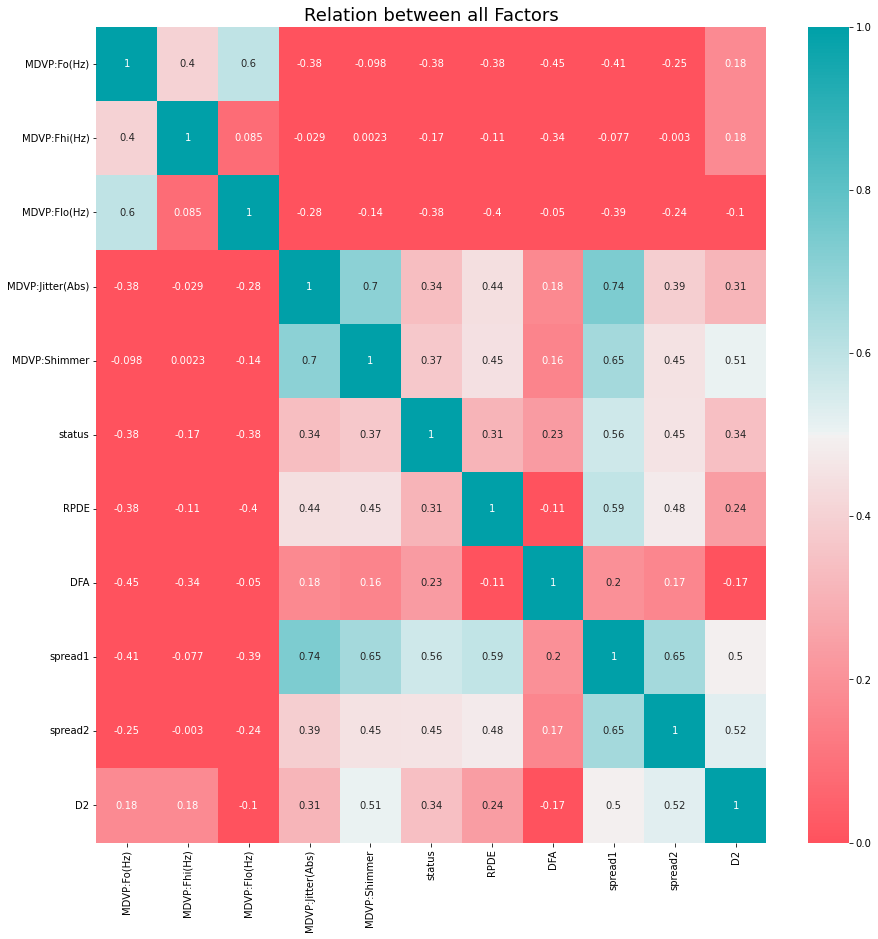

In [12]:
plt.rcParams["figure.figsize"] = (15, 15)
cmap = sns.diverging_palette(10, 200, 100, 60, as_cmap=True)
# cmap = sns.color_palette("mako", as_cmap=True)
# cmap = sns.color_palette("Spectral", as_cmap=True)
plt.title('Relation between all Factors', fontsize=18)
sns.heatmap(df.corr(), annot = True, cmap=cmap, vmin=0, vmax=1)
plt.show()

### Outliers
###### There are 61 rows that includes outliers. As dataset is not big enough, I don't remove them. I expect some models, specially SVC deal with this issue.

In [13]:
#outliers
outliers = []
nums = df.select_dtypes(include=['int64','float64'])
for i in nums.columns:
    lower = nums[i].quantile(.05)
    upper = nums[i].quantile(.95)
    subset = nums[nums[i] > upper]
    outliers.extend(list(subset.index))
    print(f'column {i} has outlier(s) in row number(s) {subset.index.values.tolist()}')

column MDVP:Fo(Hz) has outlier(s) in row number(s) [42, 43, 44, 45, 46, 47, 166, 167, 169, 170]
column MDVP:Fhi(Hz) has outlier(s) in row number(s) [73, 102, 115, 116, 117, 118, 120, 149, 186, 187]
column MDVP:Flo(Hz) has outlier(s) in row number(s) [42, 43, 44, 45, 46, 63, 64, 166, 167, 170]
column MDVP:Jitter(Abs) has outlier(s) in row number(s) [4, 98, 99, 100, 101, 102, 151, 152, 157]
column MDVP:Shimmer has outlier(s) in row number(s) [88, 91, 99, 100, 102, 146, 148, 149, 151, 152]
column status has outlier(s) in row number(s) []
column RPDE has outlier(s) in row number(s) [18, 20, 90, 100, 135, 140, 159, 162, 164, 184]
column DFA has outlier(s) in row number(s) [1, 2, 3, 4, 5, 54, 56, 57, 59, 77]
column spread1 has outlier(s) in row number(s) [17, 100, 102, 146, 148, 151, 152, 155, 157, 164]
column spread2 has outlier(s) in row number(s) [10, 17, 89, 90, 118, 119, 140, 146, 151, 164]
column D2 has outlier(s) in row number(s) [18, 84, 85, 87, 89, 90, 146, 147, 148, 152]


In [14]:
len(outliers), len(set(outliers))

(99, 61)

###### outliers are displays in below plots

<AxesSubplot:xlabel='status', ylabel='MDVP:Jitter(Abs)'>

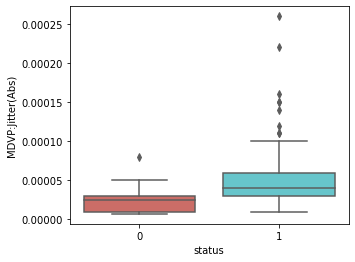

In [15]:
plt.rcParams["figure.figsize"] = (5, 4)
sns.boxplot(x='status', y='MDVP:Jitter(Abs)', data=df, palette='hls')

<AxesSubplot:xlabel='status', ylabel='MDVP:Shimmer'>

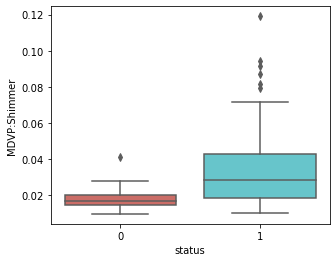

In [16]:
sns.boxplot(x='status', y='MDVP:Shimmer', data=df, palette='hls')

<AxesSubplot:xlabel='status', ylabel='RPDE'>

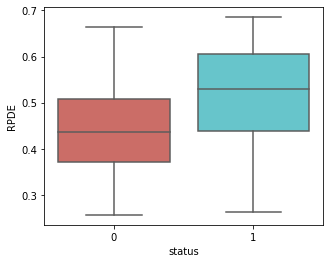

In [17]:
sns.boxplot(x='status', y='RPDE', data=df, palette='hls')

<AxesSubplot:xlabel='status', ylabel='DFA'>

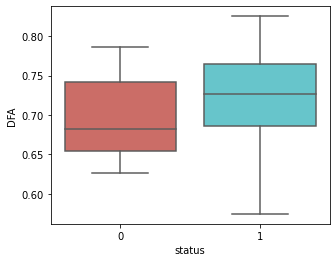

In [18]:
#there is no outlier in DFA column
sns.boxplot(x='status', y='DFA', data=df, palette='hls')

<AxesSubplot:xlabel='status', ylabel='spread1'>

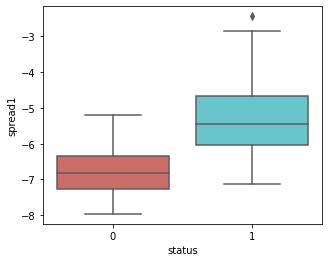

In [19]:
sns.boxplot(x='status', y='spread1', data=df, palette='hls')

<AxesSubplot:xlabel='status', ylabel='spread2'>

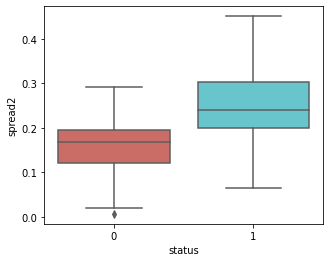

In [20]:
sns.boxplot(x='status', y='spread2', data=df, palette='hls')

<AxesSubplot:xlabel='status', ylabel='D2'>

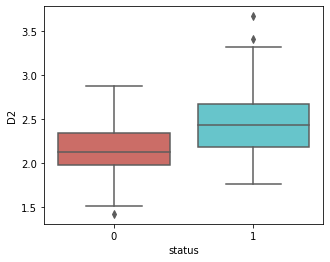

In [21]:
sns.boxplot(x='status', y='D2', data=df, palette='hls')

<AxesSubplot:xlabel='status', ylabel='MDVP:Fo(Hz)'>

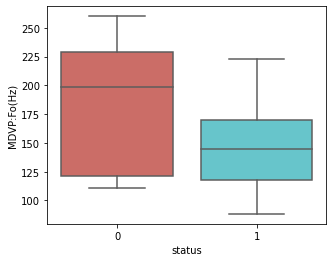

In [22]:
sns.boxplot(x='status', y='MDVP:Fo(Hz)', data=df, palette='hls')

<AxesSubplot:xlabel='status', ylabel='MDVP:Fhi(Hz)'>

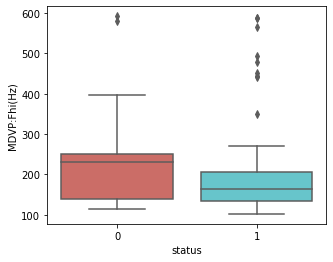

In [23]:
sns.boxplot(x='status', y='MDVP:Fhi(Hz)', data=df, palette='hls')

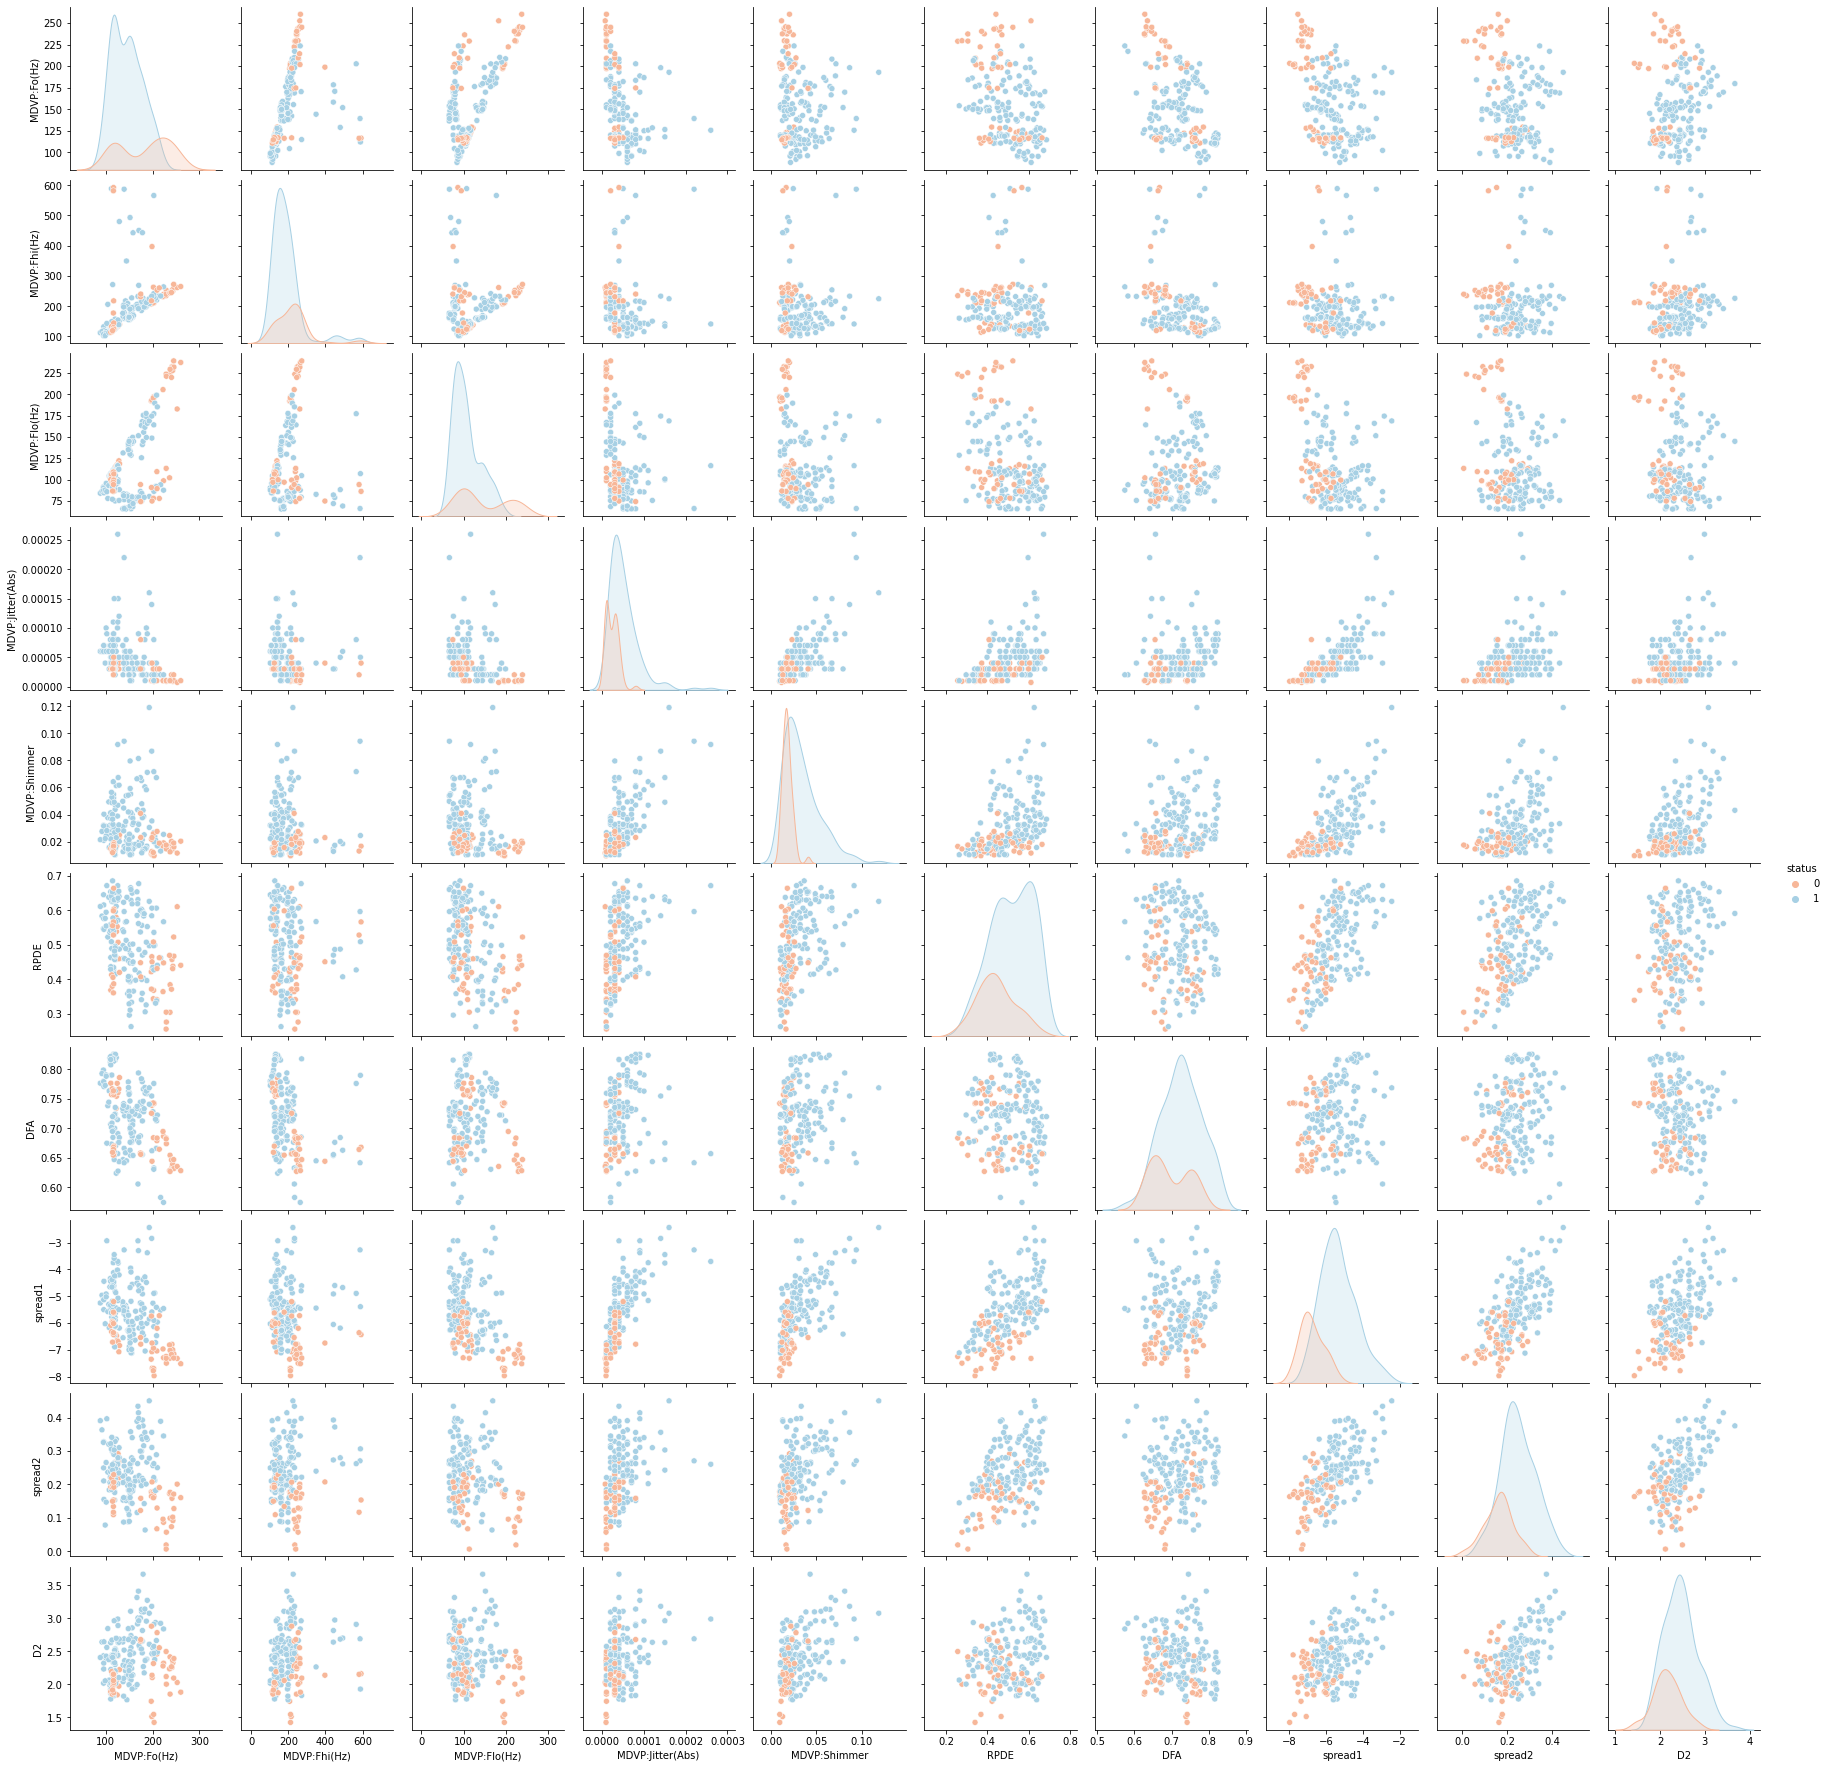

In [24]:
sns.pairplot(data=df, hue='status', palette='RdBu')

#### Although the distribution of some features are not normal, I don't Perform any transform on them as it is not an assumption of most classification algorithms.

In [25]:
# .skew 0: no skew, + right skew, - left skew, look for above 0.75 or below -0.75
skew_columns = (df.skew().sort_values(ascending=False))
skew_columns

MDVP:Jitter(Abs)    2.649071
MDVP:Fhi(Hz)        2.542146
MDVP:Shimmer        1.666480
MDVP:Flo(Hz)        1.217350
MDVP:Fo(Hz)         0.591737
spread1             0.432139
D2                  0.430384
spread2             0.144430
DFA                -0.033214
RPDE               -0.143402
status             -1.187727
dtype: float64

# Data Preparation

In [26]:
df.head(2)

MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(Abs)  MDVP:Shimmer  \
0      119.992       157.302        74.997           0.00007       0.04374   
1      122.400       148.650       113.819           0.00008       0.06134   

   status      RPDE       DFA   spread1   spread2        D2  
0       1  0.414783  0.815285 -4.813031  0.266482  2.301442  
1       1  0.458359  0.819521 -4.075192  0.335590  2.486855

###### bring status to the first column

In [27]:
cols = ['status']  + [col for col in df if col != 'status']
df = df[cols]
df.head(2)

status  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(Abs)  \
0       1      119.992       157.302        74.997           0.00007   
1       1      122.400       148.650       113.819           0.00008   

   MDVP:Shimmer      RPDE       DFA   spread1   spread2        D2  
0       0.04374  0.414783  0.815285 -4.813031  0.266482  2.301442  
1       0.06134  0.458359  0.819521 -4.075192  0.335590  2.486855

In [28]:
# get X and y
y = np.array(df.status) # this is what we want to predict (vector)
X = np.array(df.iloc[:,1:11]) # these are the features (matrix)

###### Normalize the data; the scales of columns are different like frequency, ratio... so it needs normalization.

In [29]:
def normalize(X):
    scaler = StandardScaler()
    scaler = scaler.fit(X)
    X = scaler.transform(X)
    return X

X = normalize(X)

In [30]:
X

array([[-0.82929965, -0.43616456, -0.95203729, ...,  0.80132308,
         0.48047686, -0.21053082],
       [-0.77097169, -0.53097409, -0.05772056, ...,  1.47985265,
         1.31118546,  0.27507712],
       [-0.90947638, -0.7231683 , -0.10987483, ...,  1.14144541,
         1.01768236, -0.10362861],
       ...,
       [ 0.49557839,  0.47010361, -0.96839309, ..., -1.01415428,
        -0.81807931,  0.78033848],
       [ 1.07876114,  2.19004398, -0.95417967, ..., -0.97496019,
        -0.22906571, -0.63700298],
       [ 1.45481664,  0.69224632, -0.88348115, ..., -0.03647134,
        -0.43085284,  0.45480231]])

######  Just for having some ideas about the data scattering, I reduced the dimension by tSNE. I don't use this data for classification

C:\Users\a.jalali\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\a.jalali\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


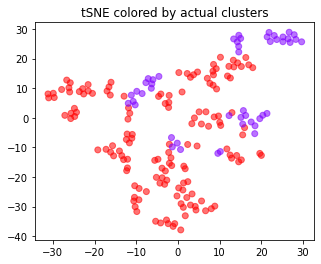

In [31]:
model = TSNE(n_components=2, random_state=42, perplexity=13, n_iter=5000)
tsne_X = model.fit_transform(X)
plt.scatter(tsne_X[:,0],tsne_X[:,1], c = df['status'], cmap = "rainbow", alpha=0.55)
plt.title('tSNE colored by actual clusters')
plt.show()

##### Split the data in train data and test data

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3 , random_state=42)

In [33]:
y_train.shape

(136,)

In [34]:
y_train

array([1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1], dtype=int64)

### functions for evaluation and  plotting learning curves

In [35]:
def evaluation(model):
    """ this function Evaluates the trained model using the test data.
    """
    y_pred = model.predict(X_test)
    cfm = confusion_matrix(y_test, y_pred)
    print(f"{cfm[0][0] + cfm[1][1]} correct and {cfm[0][1] + cfm[1][0]} incorrect predictions")
    print ("[confusion matrix]")
    print(cfm)
    print ('=== [classification report] ==='.center(54))
    print(classification_report(y_test, y_pred))

In [36]:
def plot_learning_curves(model, X_train, y_train, X_val, y_val):
    """
    plots f1 score and accuracy as classifier's evaluation parameters
    input:
        model: classification model
        X_train, y_train: training data
        X_val, y_val: test data
    """
    train_accuracies, val_accuracies = [], []
    for m in range(2, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_accuracies.append(accuracy_score(y_train_predict, y_train[:m]))
        val_accuracies.append(accuracy_score(y_val_predict, y_val))
    plt.rcParams["figure.figsize"] = (8, 3)
    plt.plot((train_accuracies), "r-+", linewidth=2, label="train accuracy")
    plt.plot((val_accuracies), "b-*", linewidth=2, label="validation accuracy")
    plt.legend(loc="lower right", fontsize=8)   
    plt.xlabel("Training set size", fontsize=14) 
    plt.ylabel("accuracy", fontsize=14)
    plt.axis([0, len(X_train),0.5,1.2])
    plt.show()

# Linear Logistic Regression

In [37]:
# Train the model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [38]:
# Evaluate the trained model using the test data.
evaluation(logreg)

50 correct and 9 incorrect predictions
[confusion matrix]
[[ 9  6]
 [ 3 41]]
           === [classification report] ===            
              precision    recall  f1-score   support

           0       0.75      0.60      0.67        15
           1       0.87      0.93      0.90        44

    accuracy                           0.85        59
   macro avg       0.81      0.77      0.78        59
weighted avg       0.84      0.85      0.84        59



##### Result of logreg.coef_ indicates that spread1(1.26) and D2 (1.25) features have the most effect on status.

In [39]:
print(logreg.coef_)

[[-0.35946803 -0.43067289 -0.20878146 -0.16586406  0.53194942 -0.22930648
   0.22269116  1.26308292  0.2282959   1.2569763 ]]


###### According to below plot, accuracy of train data decreases when its size increases. Accuracy of test data increases slightly.

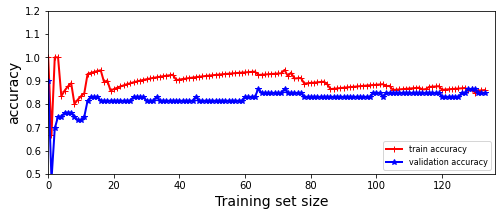

In [40]:
plot_learning_curves(logreg, X_train, y_train, X_test, y_test)

# Logistic regression by computing theta

In [41]:
def sigmoid(z):
    return  1 / (1 + np.exp(-z))

def prediction(theta, X):
    return sigmoid(np.dot(X, theta.T))

def computeCost(theta, X, y):
    """ This function measures the average errors
    between samples and model.
    """
    m,n = X.shape
    theta = np.reshape(theta, (1,n))
    pred = prediction(theta, X);
    J = (y * np.log(pred) + (1-y) * np.log(1-pred))
    return np.mean(-J)

def gradient(theta, X, y):
    """ This function only takes one step towards the minimum
    """
    m,n = X.shape
    theta = theta.reshape(1,n)
    grad = np.zeros(n)   
    error = sigmoid(np.dot(X,  theta.T)) - y
    return np.dot(error.T, X)/m

##### In this procedure, we do not split data to train and test.

In [42]:
X1 = np.c_[np.ones(X.shape[0]), X]
y1 = np.reshape(y, (len(X),1))
m,n = X1.shape
#first I set theta to [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]
theta = np.zeros(n)
computeCost(theta, X1, y1)

0.6931471805599453

In [43]:
X1.shape, y1.shape

((195, 11), (195, 1))

##### fmin_tnc method finds the optimal parameters theta for the logistic regression cost function

In [44]:
result = opt.fmin_tnc(func=computeCost, x0=theta, fprime=gradient, args=(X1, y1))
# final theta
theta_res = result[0]
theta_res

array([ 2.49629265, -0.48132485, -0.24830044, -0.0562425 , -1.19436624,
        1.18775379, -0.51425728,  0.16146689,  2.37334323,  0.49468863,
        0.673342  ])

In [45]:
# minimum computecost
computeCost(theta_res, X1, y1)

0.2834218671243808

# Polynomial Logistics Regression

In [46]:
def PolynomialLogisticsRegression(X, y, degree):
    """ function that models a polynomial Logistics Regression
    """
    poly_features = PolynomialFeatures(degree=degree, include_bias=False)
    X_poly = poly_features.fit_transform(X)
    log_reg = LogisticRegression()
    log_reg.fit(X_poly, y)
    return [log_reg, poly_features]

######  as expected, the result of polynomial_logistics_regression in degree =1 is same as linear logistic regression

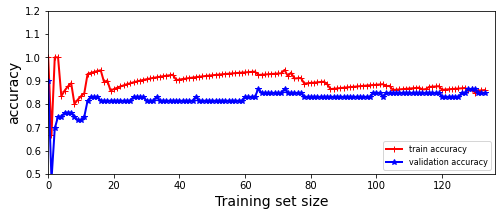

In [47]:
degree = 1
polynomial_logistics_regression1 = Pipeline([
            ("poly_features", PolynomialFeatures(degree=degree, include_bias=False)),
            ("log_reg", LogisticRegression()),
        ])
plot_learning_curves(polynomial_logistics_regression1, X_train, y_train, X_test, y_test)
plt.show()

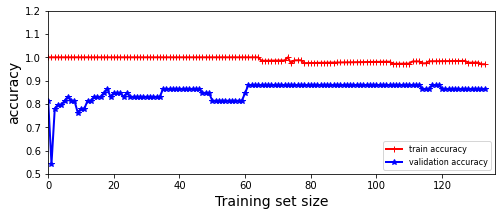

In [48]:
degree = 2
polynomial_logistics_regression2 = Pipeline([
            ("poly_features", PolynomialFeatures(degree=degree, include_bias=False)),
            ("log_reg", LogisticRegression()),
        ])
plot_learning_curves(polynomial_logistics_regression2, X_train, y_train, X_test, y_test)

In [49]:
evaluation(polynomial_logistics_regression2)

51 correct and 8 incorrect predictions
[confusion matrix]
[[ 8  7]
 [ 1 43]]
           === [classification report] ===            
              precision    recall  f1-score   support

           0       0.89      0.53      0.67        15
           1       0.86      0.98      0.91        44

    accuracy                           0.86        59
   macro avg       0.87      0.76      0.79        59
weighted avg       0.87      0.86      0.85        59



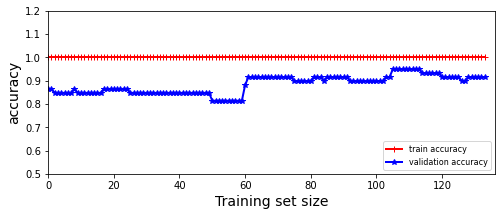

In [50]:
degree = 3
polynomial_logistics_regression3 = Pipeline([
            ("poly_features", PolynomialFeatures(degree=degree, include_bias=False)),
            ("log_reg", LogisticRegression()),
        ])
plot_learning_curves(polynomial_logistics_regression3, X_train, y_train, X_test, y_test)

In [51]:
evaluation(polynomial_logistics_regression3)

54 correct and 5 incorrect predictions
[confusion matrix]
[[10  5]
 [ 0 44]]
           === [classification report] ===            
              precision    recall  f1-score   support

           0       1.00      0.67      0.80        15
           1       0.90      1.00      0.95        44

    accuracy                           0.92        59
   macro avg       0.95      0.83      0.87        59
weighted avg       0.92      0.92      0.91        59



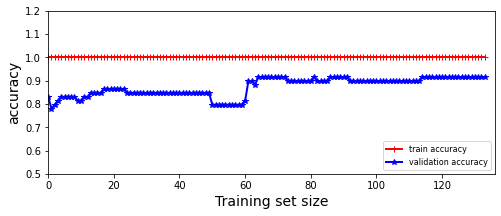

In [52]:
degree = 4
polynomial_logistics_regression4 = Pipeline([
            ("poly_features", PolynomialFeatures(degree=degree, include_bias=False)),
            ("log_reg", LogisticRegression()),
        ])
plot_learning_curves(polynomial_logistics_regression4, X_train, y_train, X_test, y_test)

###### in degree 1 accuracy fluctuates for train and validation data and is not high enough
###### in degree 2 accuracy of train data is decreasing when train size rises.
###### in degree 3 accuracy of train data are 100% and accuracy of test data are increasing and this is what we expect. Also comparing the result of evaluation of degree 2 and 3 indicates that polynomial_logistics_regression3 has a higher accuracy. 
###### in degree 4 and higher degrees, accuracyis not higher than degree 3.
###### for preventing underfitting and overfitting, I choose degree 3 from polynomial logistic regression part.

# Support Vector Machine

###### This model deals with outliers detection
Large Value of parameter C => small margin

Small Value of paramerter C => Large margin

In [53]:
svm_clf1 = SVC(kernel="linear",  C=10)
svm_clf1.fit(X_train, y_train)

SVC(C=10, kernel='linear')

In [54]:
evaluation(svm_clf1)

51 correct and 8 incorrect predictions
[confusion matrix]
[[ 9  6]
 [ 2 42]]
           === [classification report] ===            
              precision    recall  f1-score   support

           0       0.82      0.60      0.69        15
           1       0.88      0.95      0.91        44

    accuracy                           0.86        59
   macro avg       0.85      0.78      0.80        59
weighted avg       0.86      0.86      0.86        59



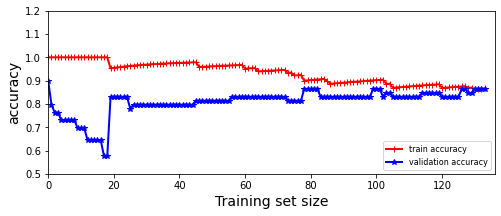

In [55]:
plot_learning_curves(svm_clf1, X_train, y_train, X_test, y_test)

In [56]:
svm_clf2 = SVC(kernel="poly",  C=10, degree=2)
svm_clf2.fit(X_train, y_train)

SVC(C=10, degree=2, kernel='poly')

In [57]:
evaluation(svm_clf2)

45 correct and 14 incorrect predictions
[confusion matrix]
[[ 7  8]
 [ 6 38]]
           === [classification report] ===            
              precision    recall  f1-score   support

           0       0.54      0.47      0.50        15
           1       0.83      0.86      0.84        44

    accuracy                           0.76        59
   macro avg       0.68      0.67      0.67        59
weighted avg       0.75      0.76      0.76        59



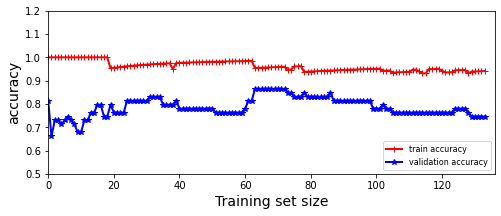

In [58]:
plot_learning_curves(svm_clf2, X_train, y_train, X_test, y_test)

###### accuracy decreased in SVC poly degree=2 while they increased remarkably in poly deagree=3 and decreased again in degree=4. so comparing the result, poly degree=3 is the best model in svc poly.

In [59]:
svm_clf3 = SVC(kernel="poly",  C=10, degree=3,probability=True)
svm_clf3.fit(X_train, y_train)

SVC(C=10, kernel='poly', probability=True)

In [60]:
evaluation(svm_clf3)

55 correct and 4 incorrect predictions
[confusion matrix]
[[12  3]
 [ 1 43]]
           === [classification report] ===            
              precision    recall  f1-score   support

           0       0.92      0.80      0.86        15
           1       0.93      0.98      0.96        44

    accuracy                           0.93        59
   macro avg       0.93      0.89      0.91        59
weighted avg       0.93      0.93      0.93        59



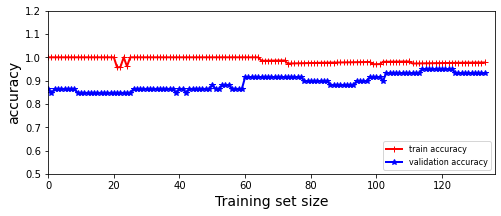

In [61]:
plot_learning_curves(svm_clf3, X_train, y_train, X_test, y_test)

In [62]:
svm_clf4 = SVC(kernel="poly",  C=10, degree=4)
svm_clf4.fit(X_train, y_train)

SVC(C=10, degree=4, kernel='poly')

In [63]:
evaluation(svm_clf4)

52 correct and 7 incorrect predictions
[confusion matrix]
[[ 8  7]
 [ 0 44]]
           === [classification report] ===            
              precision    recall  f1-score   support

           0       1.00      0.53      0.70        15
           1       0.86      1.00      0.93        44

    accuracy                           0.88        59
   macro avg       0.93      0.77      0.81        59
weighted avg       0.90      0.88      0.87        59



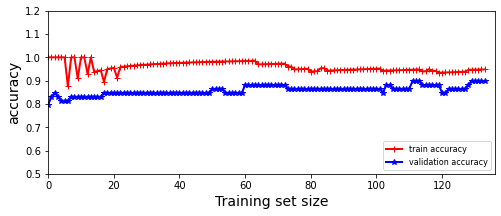

In [64]:
plot_learning_curves(svm_clf4, X_train, y_train, X_test, y_test)

###### More investigation on other kernels ("rbf" and "sigmoid") shows that "rbf" is also a good model but comparing their learning curve, SVC poly degree=3 is better because accuracy and f1-score in training data is more stable and accuracy is higher overally.

In [65]:
svm_rbf = SVC(kernel="rbf",  C=10, probability=True)
svm_rbf.fit(X_train, y_train)

SVC(C=10, probability=True)

In [66]:
evaluation(svm_rbf)

54 correct and 5 incorrect predictions
[confusion matrix]
[[10  5]
 [ 0 44]]
           === [classification report] ===            
              precision    recall  f1-score   support

           0       1.00      0.67      0.80        15
           1       0.90      1.00      0.95        44

    accuracy                           0.92        59
   macro avg       0.95      0.83      0.87        59
weighted avg       0.92      0.92      0.91        59



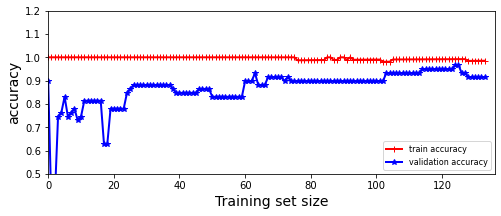

In [67]:
plot_learning_curves(svm_rbf, X_train, y_train, X_test, y_test)

In [68]:
svm_clf6 = SVC(kernel="sigmoid",  C=10)
svm_clf6.fit(X_train, y_train)

SVC(C=10, kernel='sigmoid')

In [69]:
evaluation(svm_clf6)

42 correct and 17 incorrect predictions
[confusion matrix]
[[ 3 12]
 [ 5 39]]
           === [classification report] ===            
              precision    recall  f1-score   support

           0       0.38      0.20      0.26        15
           1       0.76      0.89      0.82        44

    accuracy                           0.71        59
   macro avg       0.57      0.54      0.54        59
weighted avg       0.67      0.71      0.68        59



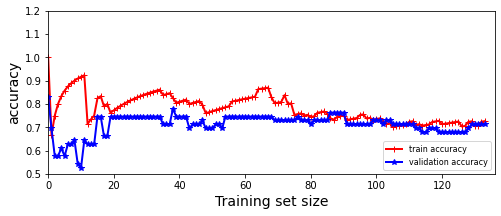

In [70]:
plot_learning_curves(svm_clf6, X_train, y_train, X_test, y_test)

# Naive Bayes

###### Naive Bayes classifier is a collection of classification algorithms based on the Bayes Theorem.

In [71]:
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)

In [72]:
evaluation(gnb)

49 correct and 10 incorrect predictions
[confusion matrix]
[[10  5]
 [ 5 39]]
           === [classification report] ===            
              precision    recall  f1-score   support

           0       0.67      0.67      0.67        15
           1       0.89      0.89      0.89        44

    accuracy                           0.83        59
   macro avg       0.78      0.78      0.78        59
weighted avg       0.83      0.83      0.83        59



###### Below plot shows that accuracy of training data and test data are not as high as previous models.

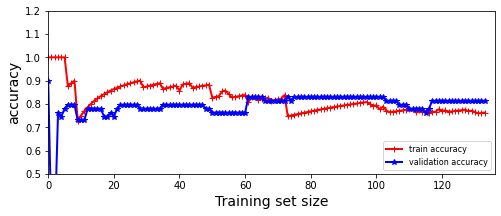

In [73]:
plot_learning_curves(gnb, X_train, y_train, X_test, y_test)

# Bagging
###### Bagging is the type of ensemble technique in which a single training algorithm is used on different subsets of the training data in parallel. Random Forest and Decision Tree algorithms is an example of bagging and I am going to apply them in the following blocks.

### Decision Tree Classification

In [74]:
tree_clf = DecisionTreeClassifier(max_depth=8, random_state=42)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=8, random_state=42)

In [75]:
evaluation(tree_clf)

48 correct and 11 incorrect predictions
[confusion matrix]
[[11  4]
 [ 7 37]]
           === [classification report] ===            
              precision    recall  f1-score   support

           0       0.61      0.73      0.67        15
           1       0.90      0.84      0.87        44

    accuracy                           0.81        59
   macro avg       0.76      0.79      0.77        59
weighted avg       0.83      0.81      0.82        59



##### Although that accuracy of training data in high, the accuracy of test data is not high enough.

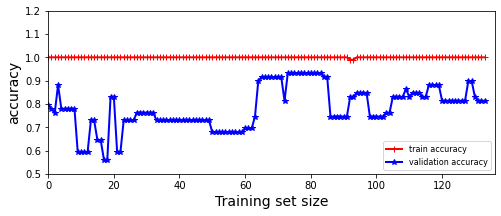

In [76]:
plot_learning_curves(tree_clf, X_train, y_train, X_test, y_test)

In [77]:
tree.export_graphviz(tree_clf, out_file='tree.dot') 

In [ ]:
# You probably need to change the path to your own installation of graphviz
call(['C:/Users/a.jalali/anaconda3/Lib/site-packages/graphviz', '-Tpng',
      'tree.dot', '-o', 'tree.png', '-Gdpi=600'], shell=True)
Image(filename = 'tree.png')

## Random Forest

In [79]:
rf = RandomForestClassifier(n_estimators = 8)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=8)

In [80]:
evaluation(rf)

54 correct and 5 incorrect predictions
[confusion matrix]
[[11  4]
 [ 1 43]]
           === [classification report] ===            
              precision    recall  f1-score   support

           0       0.92      0.73      0.81        15
           1       0.91      0.98      0.95        44

    accuracy                           0.92        59
   macro avg       0.92      0.86      0.88        59
weighted avg       0.92      0.92      0.91        59



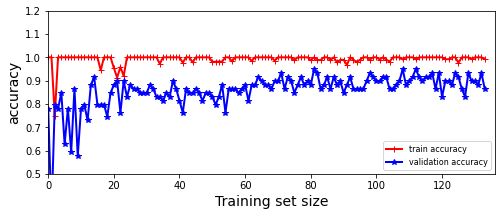

In [81]:
plot_learning_curves(rf, X_train, y_train, X_test, y_test)

# Cross-validation
##### By using the most suitable hyperparameters for the given dataset , we will have a model with the highest possible accuracy. for instance, the accuracy of Random Forest models will be changed if the value of hyperparameters alters. Below I implement k-fold cross-validation for setting various choices and it returns the best model.

In [82]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 500, num = 5)]
# The number of features to consider when looking for the best split
max_features = [2, 4,7,10]
# Maximum number of levels in tree
max_depth = [2, 5, 8]
min_samples_split = [3, 6, 10]
# Create the random grid
param_grid = {'n_estimators': n_estimators,
              'max_features': max_features,
              'max_depth': max_depth, 
              'min_samples_split': min_samples_split}

In [83]:
rfc=RandomForestClassifier()
# cv determines the cross-validation splitting strategy. 
# I used  5-fold cross validation
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)
CV_rfc.best_params_

{'max_depth': 8,
 'max_features': 4,
 'min_samples_split': 3,
 'n_estimators': 100}

In [84]:
rf_best_model = CV_rfc.best_estimator_
evaluation(rf_best_model)

53 correct and 6 incorrect predictions
[confusion matrix]
[[10  5]
 [ 1 43]]
           === [classification report] ===            
              precision    recall  f1-score   support

           0       0.91      0.67      0.77        15
           1       0.90      0.98      0.93        44

    accuracy                           0.90        59
   macro avg       0.90      0.82      0.85        59
weighted avg       0.90      0.90      0.89        59



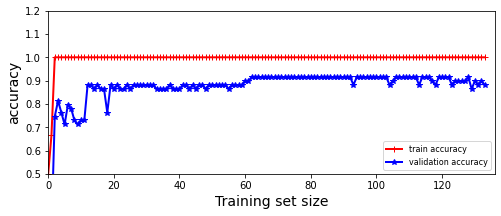

In [85]:
plot_learning_curves(rf_best_model, X_train, y_train, X_test, y_test)

### Bagging with Random Forest classifier¶

In [86]:
bg = BaggingClassifier(RandomForestClassifier(), max_features = 10, max_samples = 0.5) 
bg.fit(X_train, y_train)

BaggingClassifier(base_estimator=RandomForestClassifier(), max_features=10,
                  max_samples=0.5)

In [87]:
evaluation(bg)

54 correct and 5 incorrect predictions
[confusion matrix]
[[10  5]
 [ 0 44]]
           === [classification report] ===            
              precision    recall  f1-score   support

           0       1.00      0.67      0.80        15
           1       0.90      1.00      0.95        44

    accuracy                           0.92        59
   macro avg       0.95      0.83      0.87        59
weighted avg       0.92      0.92      0.91        59



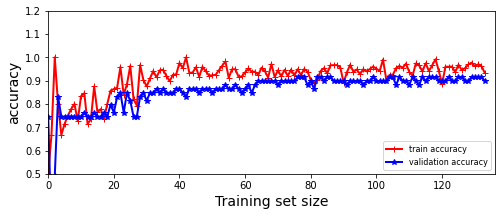

In [88]:
plot_learning_curves(bg, X_train, y_train, X_test, y_test)

# Boosting

in boosting the learners are trained sequentially, such that each subsequent learner aims to reduce the errors of the previous learners.Boosting is mainly focused on reducing bias. Gradient Boosting Classifier is an example of boosting.

#### Gradient Boosting Classifier

In [89]:
# max_features is the number of features in the data
# n_estimators is the number of weak learners to fit
# max_depth is complete binary trees of depth
# learning_rate controls overfitting
gb = GradientBoostingClassifier(n_estimators=100,  max_features=10,
                                max_depth =3, learning_rate=0.1, random_state=32)
gb.fit(X_train, y_train)

GradientBoostingClassifier(max_features=10, random_state=32)

In [90]:
evaluation(gb)

53 correct and 6 incorrect predictions
[confusion matrix]
[[11  4]
 [ 2 42]]
           === [classification report] ===            
              precision    recall  f1-score   support

           0       0.85      0.73      0.79        15
           1       0.91      0.95      0.93        44

    accuracy                           0.90        59
   macro avg       0.88      0.84      0.86        59
weighted avg       0.90      0.90      0.90        59



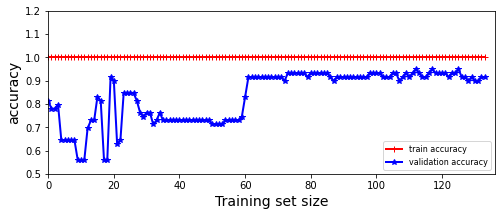

In [91]:
plot_learning_curves(gb, X_train, y_train, X_test, y_test)

# Stacking

###### Stacking is an ensemble machine learning algorithm that learns how to best combine the predictions from multiple well-performing machine learning models.
###### Unlike bagging and boosting, in stacking, the models are different. This method combines the base models using a meta-model.
###### I define estimators based on only those models that had a higher accuracy than other models.

In [92]:
estimators = [('svm', svm_clf3), ("rbf", svm_rbf),('gnb', gnb),
              ("bg", bg), ('poly3', polynomial_logistics_regression3)]
sclf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
sclf.fit(X_train, y_train)

StackingClassifier(estimators=[('svm',
                                SVC(C=10, kernel='poly', probability=True)),
                               ('rbf', SVC(C=10, probability=True)),
                               ('gnb', GaussianNB()),
                               ('bg',
                                BaggingClassifier(base_estimator=RandomForestClassifier(),
                                                  max_features=10,
                                                  max_samples=0.5)),
                               ('poly3',
                                Pipeline(steps=[('poly_features',
                                                 PolynomialFeatures(degree=3,
                                                                    include_bias=False)),
                                                ('log_reg',
                                                 LogisticRegression())]))],
                   final_estimator=LogisticRegression())

In [93]:
evaluation(sclf)

54 correct and 5 incorrect predictions
[confusion matrix]
[[10  5]
 [ 0 44]]
           === [classification report] ===            
              precision    recall  f1-score   support

           0       1.00      0.67      0.80        15
           1       0.90      1.00      0.95        44

    accuracy                           0.92        59
   macro avg       0.95      0.83      0.87        59
weighted avg       0.92      0.92      0.91        59



# Voting

###### Voting is an ensemble method that combines the performances of different models to predict.
###### in Hard Voting a model is selected to make the final prediction by the majority vote for accuracy.
###### in Hard Voting I use all models to be combined because the majority vote become considered.
###### Soft Voting model is a combination that is obtained by averaging out the probabilities calculated by every algorithms.
##### in Soft voting I use best models because the result is based on averaging.

In [94]:
estimators = [('dtree', tree_clf), ('lg',logreg), ('svm', svm_clf3), ("rbf", svm_rbf), ('gnb', gnb),
              ('rf', rf_best_model), ('poly3', polynomial_logistics_regression3)]
hard_vot = VotingClassifier(estimators = estimators, voting = 'hard')
hard_vot.fit(X_train, y_train)

VotingClassifier(estimators=[('dtree',
                              DecisionTreeClassifier(max_depth=8,
                                                     random_state=42)),
                             ('lg', LogisticRegression()),
                             ('svm',
                              SVC(C=10, kernel='poly', probability=True)),
                             ('rbf', SVC(C=10, probability=True)),
                             ('gnb', GaussianNB()),
                             ('rf',
                              RandomForestClassifier(max_depth=8,
                                                     max_features=4,
                                                     min_samples_split=3)),
                             ('poly3',
                              Pipeline(steps=[('poly_features',
                                               PolynomialFeatures(degree=3,
                                                                  include_bias=False)),
                                              ('log_reg',
                                               LogisticRegression())]))])

In [95]:
evaluation(hard_vot)

55 correct and 4 incorrect predictions
[confusion matrix]
[[11  4]
 [ 0 44]]
           === [classification report] ===            
              precision    recall  f1-score   support

           0       1.00      0.73      0.85        15
           1       0.92      1.00      0.96        44

    accuracy                           0.93        59
   macro avg       0.96      0.87      0.90        59
weighted avg       0.94      0.93      0.93        59



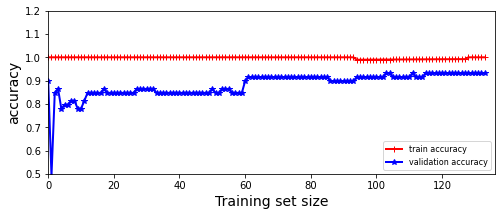

In [96]:
plot_learning_curves(hard_vot, X_train, y_train, X_test, y_test)

In [97]:
estimators = [('svm', svm_clf3), ("rbf", svm_rbf),('rf', rf_best_model),
              ('gnb', gnb), ('poly3', polynomial_logistics_regression3)]
soft_vot = VotingClassifier(estimators = estimators, voting = 'soft')
soft_vot.fit(X_train, y_train)

VotingClassifier(estimators=[('svm',
                              SVC(C=10, kernel='poly', probability=True)),
                             ('rbf', SVC(C=10, probability=True)),
                             ('rf',
                              RandomForestClassifier(max_depth=8,
                                                     max_features=4,
                                                     min_samples_split=3)),
                             ('gnb', GaussianNB()),
                             ('poly3',
                              Pipeline(steps=[('poly_features',
                                               PolynomialFeatures(degree=3,
                                                                  include_bias=False)),
                                              ('log_reg',
                                               LogisticRegression())]))],
                 voting='soft')

In [98]:
evaluation(soft_vot)

54 correct and 5 incorrect predictions
[confusion matrix]
[[10  5]
 [ 0 44]]
           === [classification report] ===            
              precision    recall  f1-score   support

           0       1.00      0.67      0.80        15
           1       0.90      1.00      0.95        44

    accuracy                           0.92        59
   macro avg       0.95      0.83      0.87        59
weighted avg       0.92      0.92      0.91        59



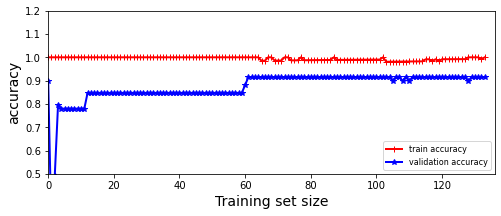

In [99]:
plot_learning_curves(soft_vot, X_train, y_train, X_test, y_test)

##### generally, f1-score for status = 1 is higher than status = 0 and it is normal because the number of PD is higher than healthy.

##### soft_vot, hard_vot, sclf and rf_best_model are the best model that can predict whether a person has Parkinson's disease or not to 93% accuracy, 54 correct and 5 incorrect predictions. 